In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

# Action Hero Movies Regression Analysis

In [243]:
movies = pd.read_csv('movies.csv', index_col=0)

In [244]:
movies.rename(columns={'Sci-Fi':'Sci_Fi', 'Reality-Tv':'Reality_Tv'}, inplace=True)
movies.reset_index(drop=True)

,Title,Rating,Runtime,IMDB_Score,Action,Adventure,Animation,Biography,Comedy,Crime,...,Tony Gilroy,Tony Scott,Uwe Boll,Walter Hill,Warren Beatty,William Friedkin,Wolfgang Petersen,Wych Kaosayananda,Xavier Gens,Zack Snyder
0,Logan,3.0,137.0,8.6,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,X-Men: Apocalypse,4.0,144.0,7.1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Doctor Strange,4.0,115.0,7.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Wolverine,4.0,126.0,6.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Deadpool,3.0,108.0,8.1,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,X-Men Origins: Wolverine,4.0,107.0,6.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,X-Men,4.0,104.0,7.4,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Suicide Squad,4.0,123.0,6.3,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,X-Men: Days of Future Past,4.0,132.0,8.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,The Magnificent Seven,4.0,133.0,7.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
# no short films, so we can delete
del movies['Short']

In [246]:
movies.dtypes

Title                  object
Rating                float64
Runtime               float64
IMDB_Score            float64
Action                  int64
Adventure               int64
Animation               int64
Biography               int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Family                  int64
Fantasy                 int64
History                 int64
Horror                  int64
Music                   int64
Musical                 int64
Mystery                 int64
Reality_Tv              int64
Romance                 int64
Sci_Fi                  int64
Sport                   int64
Thriller                int64
War                     int64
Western                 int64
Budget                  int64
DomesticGross           int64
Release                object
WorldwideGross          int64
                       ...   
Steve Conrad          float64
Steve Lightfoot       float64
Steven E. 

In [302]:
movies[['Rating', 'Runtime', 'IMDB_Score', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Reality_Tv', 'Romance', 'Sci_Fi', 'Sport', 'Thriller',
       'War', 'Western', 'Budget', 'DomesticGross', 'X_Factor', 'Rating_Count', 'User_Review_Count',
       'Critic_Review_Count',  'Foreign','WorldwideGross']].describe()

,Rating,Runtime,IMDB_Score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,War,Western,Budget,DomesticGross,X_Factor,Rating_Count,User_Review_Count,Critic_Review_Count,Foreign,WorldwideGross
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.0,...,400.0000,400.000000,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,4.000000e+02
mean,3.345000,113.230000,6.352250,0.945000,0.462500,0.015000,0.015000,0.17750,0.287500,0.0,...,0.0025,0.015000,7.427867e+07,9.146088e+07,0.520000,1.726751e+05,475.897500,218.342500,0.060000,2.219740e+08
std,0.676105,17.900928,1.076099,0.228266,0.499216,0.121705,0.121705,0.38257,0.453163,0.0,...,0.0500,0.121705,6.302393e+07,9.867018e+07,0.500226,2.130901e+05,597.042353,167.740521,0.237784,2.641124e+08
min,2.000000,76.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0000,0.000000,7.000000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00
25%,3.000000,100.000000,5.800000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0000,0.000000,2.500000e+07,2.423137e+07,0.000000,3.933175e+04,148.000000,92.500000,0.000000,4.059467e+07
50%,3.000000,110.000000,6.400000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0000,0.000000,5.500000e+07,5.393235e+07,1.000000,9.966050e+04,294.000000,164.500000,0.000000,1.318175e+08
75%,4.000000,125.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.0,...,0.0000,0.000000,1.100000e+08,1.336434e+08,1.000000,2.185542e+05,550.500000,298.500000,0.000000,3.061817e+08
max,4.000000,191.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,...,1.0000,1.000000,3.000000e+08,6.521980e+08,1.000000,1.767124e+06,5081.000000,815.000000,1.000000,1.671641e+09


In [247]:
movies['Release'] = pd.to_datetime(movies['Release'], format='%Y-%M-%d').dt.date

In [248]:
movies['Release'] = pd.to_datetime(movies.Release)

In [249]:
movies_sort = movies.sort('Release')

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [250]:
movies_sort['Release']

290   1965-01-29
230   1967-01-13
318   1969-01-18
342   1969-01-18
273   1973-01-27
337   1974-01-20
191   1976-01-01
405   1976-01-11
95    1976-01-21
286   1977-01-13
335   1979-01-29
238   1980-01-05
122   1980-01-21
204   1981-01-10
51    1981-01-12
305   1981-01-26
373   1982-01-18
292   1982-01-20
136   1982-01-22
40    1982-01-25
331   1983-01-10
375   1983-01-15
267   1984-01-05
112   1984-01-23
60    1984-01-26
236   1984-01-29
383   1985-01-04
71    1985-01-04
347   1985-01-10
266   1985-01-10
         ...    
280   2015-01-30
49    2015-01-31
179   2015-01-31
12    2016-01-01
128   2016-01-01
30    2016-01-03
64    2016-01-04
2     2016-01-04
72    2016-01-05
8     2016-01-05
15    2016-01-06
379   2016-01-06
22    2016-01-10
96    2016-01-11
5     2016-01-12
265   2016-01-15
219   2016-01-15
329   2016-01-15
50    2016-01-15
28    2016-01-17
18    2016-01-20
17    2016-01-21
21    2016-01-22
10    2016-01-23
14    2016-01-25
52    2016-01-26
1     2016-01-27
33    2016-01-

Oldest movie in 1965

In [251]:
movies = movies.drop('Unnamed: 39', 1)

In [252]:
movies.columns.unique()

array(['Title', 'Rating', 'Runtime', 'IMDB_Score', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Reality_Tv', 'Romance', 'Sci_Fi', 'Sport', 'Thriller',
       'War', 'Western', 'Budget', 'DomesticGross', 'Release',
       'WorldwideGross', 'X_Factor', 'Rating_Count', 'User_Review_Count',
       'Critic_Review_Count', 'Director', 'Country', 'Foreign',
       'Adam Shankman', 'Alan Taylor', 'Alejandro G. Iñárritu',
       'Aleksander Bach', 'Alex De Rakoff', 'Alex Kurtzman', 'Alex Proyas',
       'Andrew Adamson', 'Andrew Davis', 'Andrew Stanton',
       'Andrzej Bartkowiak', 'Ang Lee', 'Annabel Jankel', 'Anthony Russo',
       'Antoine Fuqua', 'Ariel Vromen', 'Armand Assante',
       'Arnold Schwarzenegger', 'Babak Najafi', 'Barry Levinson',
       'Barry Sonnenfeld', 'Betty Thomas', 'Boaz Yakin', 'Bob Fosse',
       'Brad Bird', 'Brad Peyton', 'Br

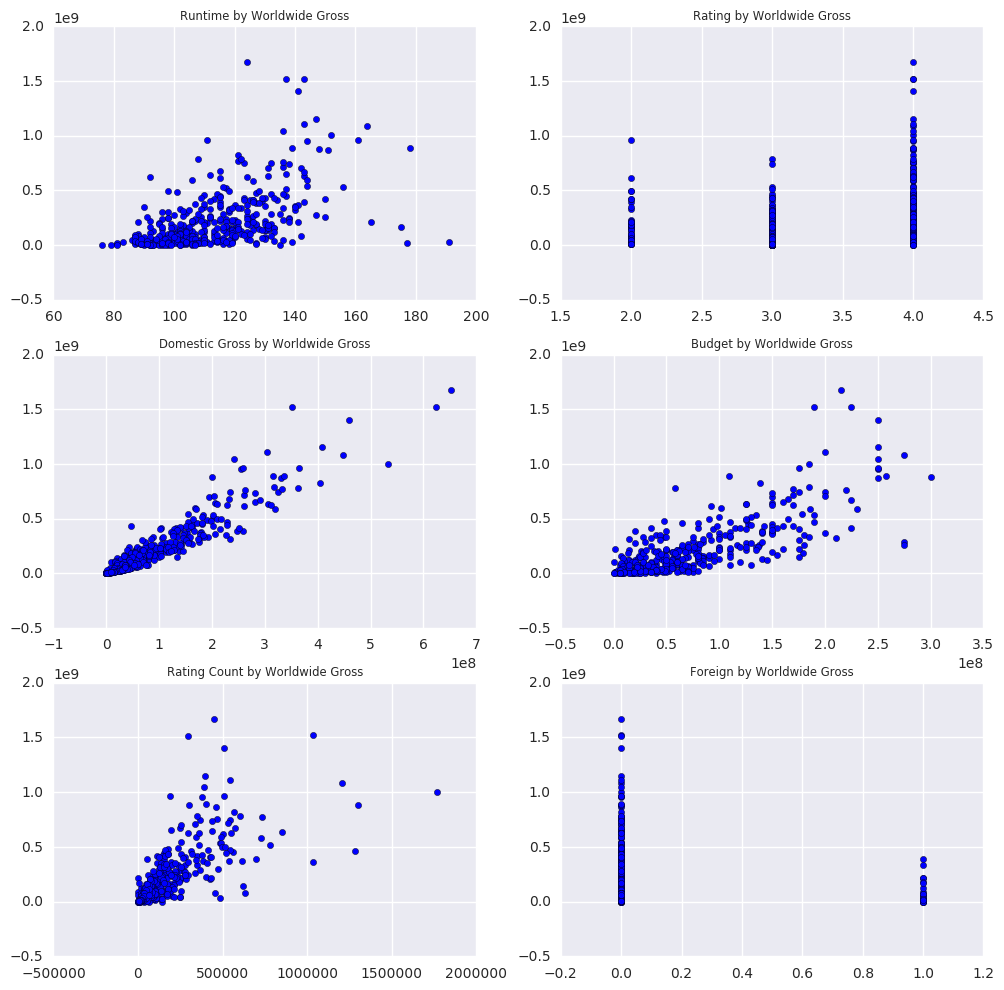

In [253]:
# explore scatter matrix with some features
# independent variable will be Worldwide Gross Revenue
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(321)
ax1.scatter(movies['Runtime'], movies['WorldwideGross'])
ax1.set_title('Runtime by Worldwide Gross', fontsize='small')
ax2 = fig.add_subplot(322)
ax2.scatter(movies['Rating'], movies['WorldwideGross'])
ax2.set_title('Rating by Worldwide Gross', fontsize='small')
ax3 = fig.add_subplot(323)
ax3.scatter(movies['DomesticGross'], movies['WorldwideGross'])
ax3.set_title('Domestic Gross by Worldwide Gross', fontsize='small')
ax4 = fig.add_subplot(324)
ax4.scatter(movies['Budget'], movies['WorldwideGross'])
ax4.set_title('Budget by Worldwide Gross', fontsize='small')
ax5 = fig.add_subplot(325)
ax5.scatter(movies['Rating_Count'], movies['WorldwideGross'])
ax5.set_title('Rating Count by Worldwide Gross', fontsize='small')
ax6 = fig.add_subplot(326)
ax6.scatter(movies['Foreign'], movies['WorldwideGross'])
ax6.set_title('Foreign by Worldwide Gross', fontsize='small')
fig.savefig('scatterplots.png', dpi=fig.dpi)

Looks like a positive relationship for domestic gross and budget, some for runtime but a little scattered.
PG-13 movies seem to have a much more scattered worldwide gross.

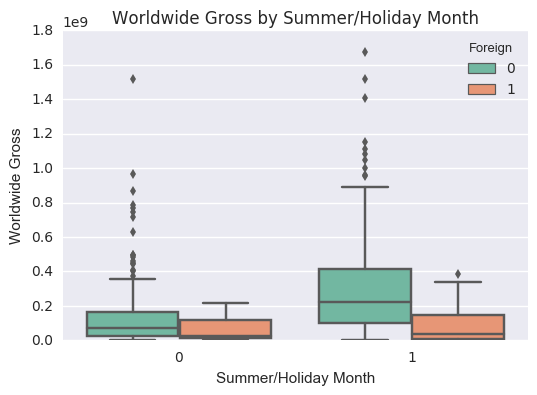

In [254]:
sns.boxplot(x="X_Factor", y="WorldwideGross", hue='Foreign', data=movies, palette='Set2')
plt.xlabel('Summer/Holiday Month')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Summer/Holiday Month')
fig.savefig('summer-holiday-foreign.png', dpi=fig.dpi)

In [256]:
x.dtypes

Rating                 float64
Runtime                float64
IMDB_Score             float64
Action                   int64
Adventure                int64
Animation                int64
Biography                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Family                   int64
Fantasy                  int64
History                  int64
Horror                   int64
Music                    int64
Musical                  int64
Mystery                  int64
Reality_Tv               int64
Romance                  int64
Sci_Fi                   int64
Sport                    int64
Thriller                 int64
War                      int64
Western                  int64
Budget                   int64
DomesticGross            int64
X_Factor                 int64
Rating_Count           float64
User_Review_Count      float64
Critic_Review_Count    float64
Foreign                  int64
dtype: o

In [272]:
movies.reset_index(drop=True)

,Title,Rating,Runtime,IMDB_Score,Action,Adventure,Animation,Biography,Comedy,Crime,...,Tony Gilroy,Tony Scott,Uwe Boll,Walter Hill,Warren Beatty,William Friedkin,Wolfgang Petersen,Wych Kaosayananda,Xavier Gens,Zack Snyder
0,Logan,3.0,137.0,8.6,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,X-Men: Apocalypse,4.0,144.0,7.1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Doctor Strange,4.0,115.0,7.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Wolverine,4.0,126.0,6.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Deadpool,3.0,108.0,8.1,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,X-Men Origins: Wolverine,4.0,107.0,6.7,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,X-Men,4.0,104.0,7.4,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Suicide Squad,4.0,123.0,6.3,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,X-Men: Days of Future Past,4.0,132.0,8.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,The Magnificent Seven,4.0,133.0,7.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
# regression excluding all object types
x = movies[['Rating', 'Runtime', 'IMDB_Score', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Reality_Tv', 'Romance', 'Sci_Fi', 'Sport', 'Thriller',
       'War', 'Western', 'Budget', 'DomesticGross', 'X_Factor', 'Rating_Count', 'User_Review_Count',
       'Critic_Review_Count',  'Foreign']]
x = sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
result.summary()

,Rating,Runtime,IMDB_Score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Thriller,War,Western,Budget,DomesticGross,X_Factor,Rating_Count,User_Review_Count,Critic_Review_Count,Foreign
0,3.0,137.0,8.6,1,0,0,0,0,0,0,...,0,0,0,127000000,163724809,0,156083.0,662.0,442.0,0
1,4.0,144.0,7.1,1,1,0,0,0,0,0,...,0,0,0,178000000,155442489,1,256653.0,710.0,447.0,0
2,4.0,115.0,7.7,1,1,0,0,0,0,0,...,0,0,0,165000000,232638727,1,250924.0,614.0,491.0,0
4,4.0,126.0,6.7,1,1,0,0,0,0,0,...,0,0,0,115000000,132556852,1,348355.0,544.0,453.0,0
5,3.0,108.0,8.1,1,1,0,0,1,0,0,...,0,0,0,58000000,363070709,0,603357.0,1166.0,624.0,0
6,4.0,107.0,6.7,1,1,0,0,0,0,0,...,0,0,0,150000000,179883157,1,381799.0,653.0,355.0,0
7,4.0,104.0,7.4,1,1,0,0,0,0,0,...,0,0,0,75000000,157299717,1,475462.0,1408.0,292.0,0
8,4.0,123.0,6.3,1,1,0,0,0,0,0,...,0,0,0,175000000,325100054,0,366561.0,1692.0,616.0,0
9,4.0,132.0,8.0,1,1,0,0,0,0,0,...,0,0,0,200000000,233921534,1,543124.0,761.0,544.0,0
10,4.0,133.0,7.0,1,1,0,0,0,0,0,...,0,0,1,90000000,93427848,0,110831.0,324.0,333.0,0


All of the genres have a high p-value (>0.05), except for Thriller so we can remove them.
Let's leave rating, runtime and IMDB_Score although they have a high p-value and check the results in the next model.

In [282]:
x = movies[['Budget', 'Rating', 'Runtime', 'IMDB_Score', 'DomesticGross', 'Thriller', 'X_Factor', 'Rating_Count', 
            'User_Review_Count', 'Critic_Review_Count',  'Foreign']]
x = sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     426.2
Date:                Thu, 16 Mar 2017   Prob (F-statistic):          6.51e-209
Time:                        14:44:09   Log-Likelihood:                -7809.6
No. Observations:                 400   AIC:                         1.564e+04
Df Residuals:                     388   BIC:                         1.569e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const               -6.913e+07    3.9e+07     -1.774      0.077     -1.46e+08  7.47e+06
Budget                  0.8497      0.105      8.113      0.000         0.644     1.056
Rating              -1.071e+07    6.1e+06     -1.756      0.080     -2.27e+07  1.28e+06
Runtime              4.418e+05   2.84e+05      1.558      0.120     -1.16e+05  9.99e+05
IMDB_Score          -2.747e+05    4.8e+06     -0.057      0.954     -9.71e+06  9.16e+06
DomesticGross           2.1160      0.069     30.890      0.000         1.981     2.251
Thriller             2.962e+07   8.53e+06      3.475      0.001      1.29e+07  4.64e+07
X_Factor            -9.282e+06   8.22e+06     -1.129      0.259     -2.54e+07  6.88e+06
Rating_Count          -72.4617     41.540     -1.744      0.082      -154.132     9.209
User_Review_Count   -3580.1376   1.22e+04     -0.294      0.769     -2.75e+04  2.03e+04
Critic_Review_Count  1.545e+05   3.49e+04      4.423      0.000      8.58e+04  2.23e+05
Foreign             -1.162e+07    1.6e+07     -0.727      0.468     -4.31e+07  1.98e+07
==============================================================================
Omnibus:                      201.569   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2731.321
Skew:                           1.789   Prob(JB):                         0.00
Kurtosis:                      15.291   Cond. No.                     1.69e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can finally scale our model down to three features: Budget, DomesticGross, Thriller

In [293]:
x = movies[['Budget', 'DomesticGross', 'Thriller', 'Critic_Review_Count']]
x = sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1149.
Date:                Thu, 16 Mar 2017   Prob (F-statistic):          5.18e-216
Time:                        15:11:18   Log-Likelihood:                -7816.6
No. Observations:                 400   AIC:                         1.564e+04
Df Residuals:                     395   BIC:                         1.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const               -6.217e+07   6.97e+06     -8.915      0.000     -7.59e+07 -4.85e+07
Budget                  0.8746      0.091      9.621      0.000         0.696     1.053
DomesticGross           2.0141      0.055     36.372      0.000         1.905     2.123
Thriller             3.075e+07   8.52e+06      3.610      0.000       1.4e+07  4.75e+07
Critic_Review_Count  1.221e+05    3.2e+04      3.817      0.000      5.92e+04  1.85e+05
==============================================================================
Omnibus:                      206.625   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3370.064
Skew:                           1.784   Prob(JB):                         0.00
Kurtosis:                      16.765   Cond. No.                     4.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

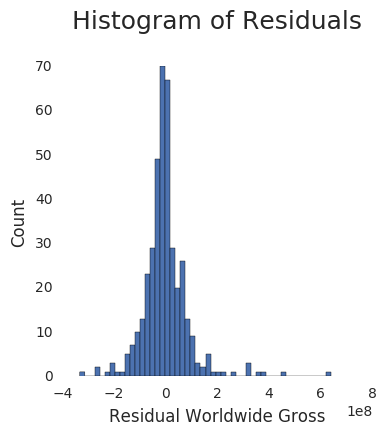

In [292]:
fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
model.resid.hist(bins=50)
ax.set_xlabel('Residual Worldwide Gross',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Histogram of Residuals',fontsize=18)
ttl=ax.title
ttl.set_position([.5, 1.1])
ax.set_axis_bgcolor('white')
fig.savefig('resid_histo.png')

The residuals are normally distributed.

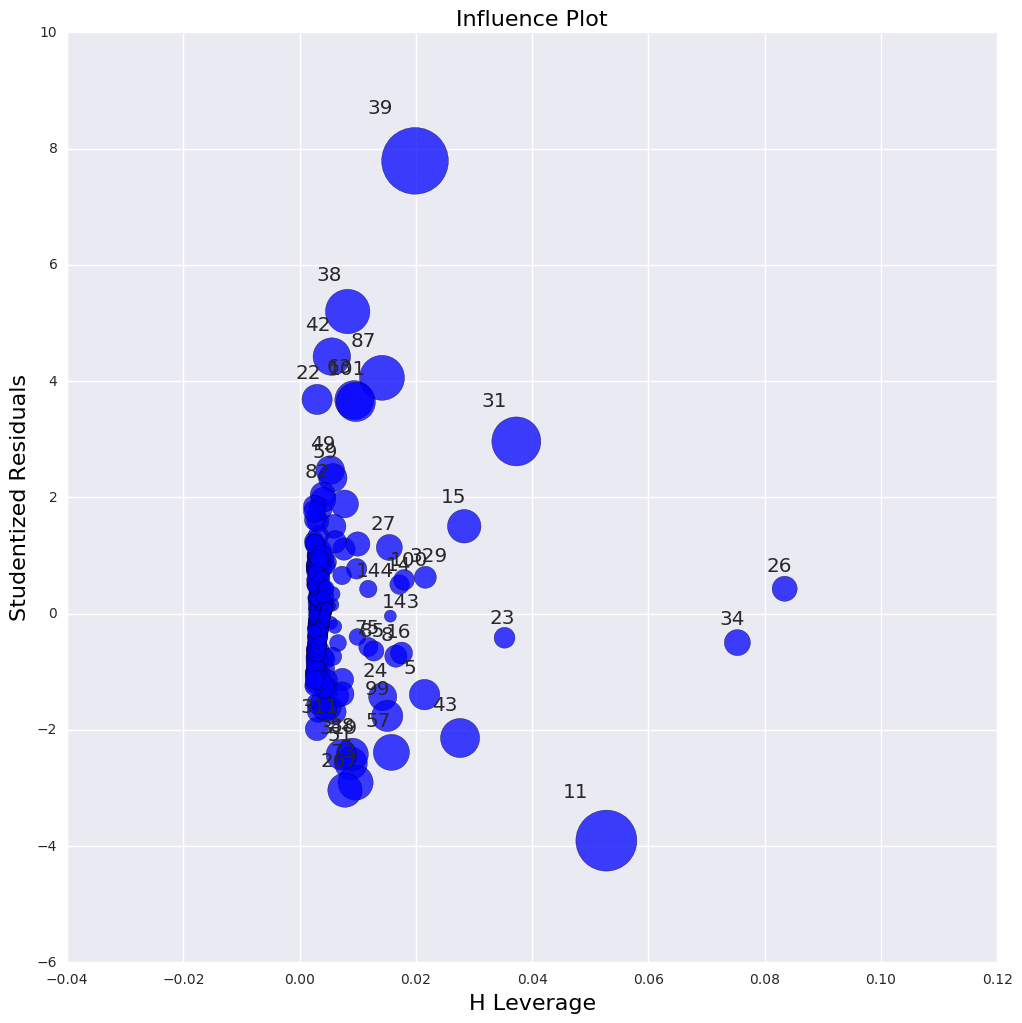

In [291]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(model, ax=ax)
fig.savefig('influence.png')

In [296]:
movies.ix[11]

Title                     The Dark Knight
Rating                                  4
Runtime                               152
IMDB_Score                              9
Action                                  1
Adventure                               0
Animation                               0
Biography                               0
Comedy                                  0
Crime                                   1
Documentary                             0
Drama                                   1
Family                                  0
Fantasy                                 0
History                                 0
Horror                                  0
Music                                   0
Musical                                 0
Mystery                                 0
Reality_Tv                              0
Romance                                 0
Sci_Fi                                  0
Sport                                   0
Thriller                          

Furious 7 has a relatively high residual, which makes it an outlier because of it's high Worldwide Gross.

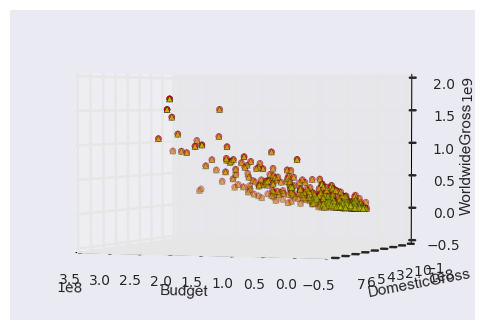

In [288]:
# 3D graph with budget and domestic gross against worldwide gross
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
for c, m in [('r', 'o'), ('y', '^')]:
    xs = movies['Budget']
    ys = movies['DomesticGross']
    zs = movies['WorldwideGross']
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Budget')
ax.set_ylabel('DomesticGross')
ax.set_zlabel('WorldwideGross')

ax.view_init(elev=2, azim=110)

plt.show()

In [289]:
x = movies[['Budget', 'Thriller']]
x = sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     297.7
Date:                Thu, 16 Mar 2017   Prob (F-statistic):           1.02e-79
Time:                        14:46:40   Log-Likelihood:                -8140.6
No. Observations:                 400   AIC:                         1.629e+04
Df Residuals:                     397   BIC:                         1.630e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3.258e+07   1.46e+07     -2.235      0.026     -6.12e+07 -3.92e+06
Budget         3.2779      0.135     24.349      0.000         3.013     3.543
Thriller    4.101e+07   1.91e+07      2.149      0.032      3.48e+06  7.85e+07
==============================================================================
Omnibus:                      152.968   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1034.413
Skew:                           1.463   Prob(JB):                    2.40e-225
Kurtosis:                      10.315   Cond. No.                     2.43e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we removed Domestic Gross, we would only be able to explain 60% of the variation of Worldwide Gross with Budget and Thriller.

In [290]:
x = movies[['DomesticGross']]
x = sm.add_constant(x)
model = sm.OLS(movies['WorldwideGross'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     3109.
Date:                Thu, 16 Mar 2017   Prob (F-statistic):          3.60e-190
Time:                        14:46:43   Log-Likelihood:                -7888.6
No. Observations:                 400   AIC:                         1.578e+04
Df Residuals:                     398   BIC:                         1.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -8.532e+06   6.08e+06     -1.404      0.161     -2.05e+07  3.41e+06
DomesticGross     2.5203      0.045     55.760      0.000         2.431     2.609
==============================================================================
Omnibus:                      184.154   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.443
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                      13.381   Cond. No.                     1.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With Domestic Gross alone, we would have an R2 of 0.887 for action hero movies. Thus, we can conclude there is a strong relationship between how could a movie will be worldwide, if it does well domestically.